# E1: Análisis Exploratorio de Datos en Python con Pandas y NumPy

En esta prueba práctica, los estudiantes aplicarán sus conocimientos en Python y herramientas de análisis de datos dentro del entorno Jupyter Notebook. A partir de un dataset ficticio de pacientes, deberán demostrar su capacidad para:
- Configurar el entorno de trabajo en Anaconda y Jupyter Notebook.
- Utilizar Pandas y NumPy para la manipulación y exploración de datos.
- Aplicar operaciones estadísticas básicas para extraer información relevante.
- Generar visualizaciones de datos con Matplotlib.

Este ejercicio tiene como objetivo evaluar la habilidad del estudiante para trabajar con datos en Python, desde su carga y preprocesamiento hasta su análisis y visualización. Se espera que los participantes estructuren su código de manera clara y utilicen buenas prácticas de programación.


#### Configuración del Entorno:

- Verifica que las librerías necesarias (numpy y pandas) estén instaladas en tu entorno. Si no lo están, instálalas usando pip o conda.
- Importa las librerías necesarias (numpy, pandas, matplotlib.pyplot) y muestra sus versiones en el notebook.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp

#### Carga y Exploración de Datos:

- Descarga y carga el archivo datos_pacientes.csv en un DataFrame de Pandas.
- Muestra las primeras 5 filas del dataset.
- Obtén información sobre los tipos de datos y verifica la existencia de valores nulos en el dataset.


In [ ]:
df = pd.read_csv('datos_pacientes.csv', index_col=['ID'])
#Muestra las 5 primeras filas del dataset
df.head()

,Edad,Género,Peso,Altura,Presión_Arterial
ID,,,,,
1,71,F,116.4,1.69,143
2,34,M,67.7,1.50,127
3,80,M,75.1,1.69,137
4,40,M,76.6,1.90,116
5,43,M,92.4,1.80,109


In [ ]:
# Obtener información sobre los tipos de datos
df.info()
# Verificar la existencia de valores nulos
df.isnull().head()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Edad              1000 non-null   int64  
 1   Género            1000 non-null   object 
 2   Peso              1000 non-null   float64
 3   Altura            1000 non-null   float64
 4   Presión_Arterial  1000 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 46.9+ KB


,Edad,Género,Peso,Altura,Presión_Arterial
ID,,,,,
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False


#### Análisis Estadístico con Pandas:

- Muestra un resumen estadístico de las variables numéricas.
- Calcula la edad promedio de los pacientes y el número de pacientes por género.
- Identifica cuántos pacientes tienen una presión arterial superior a 130 mmHg.

In [ ]:
# Muestra un resumen estadístico de las variables numéricas.
df.describe()


,Edad,Peso,Altura,Presión_Arterial
count,1000.000000,1000.00000,1000.000000,1000.00000
mean,54.195000,84.51870,1.757730,135.25200
std,20.521747,20.12022,0.141855,25.85767
min,20.000000,50.00000,1.500000,90.00000
25%,36.000000,66.50000,1.640000,112.00000
50%,54.000000,84.75000,1.760000,136.00000
75%,72.000000,102.05000,1.880000,157.00000
max,89.000000,119.80000,2.000000,179.00000


In [ ]:
# Calcula la edad promedio de los pacientes
edad_promedio = df['Edad'].mean()
print(f'Edad promedio de los pacientes: {edad_promedio}')



Edad promedio de los pacientes: 54.195


In [ ]:
# Número de pacientes por género
pacientes_por_genero = df['Género'].value_counts()
print(f'Número de pacientes por género:\n{pacientes_por_genero}')

Número de pacientes por género:
Género
M    502
F    498
Name: count, dtype: int64


In [ ]:
# Identifica cuántos pacientes tienen una presión arterial superior a 130 mmHg.
pacientes_alta_presion = df[df['presión_arterial'] > 130].shape[0]
print(f'Número de pacientes con presión arterial superior a 130 mmHg: {pacientes_alta_presion}')


Número de pacientes con presión arterial superior a 130 mmHg: 555


#### Manipulación de Datos con NumPy y Pandas:

- Crea una nueva columna llamada IMC (Índice de Masa Corporal, BMI) utilizando la fórmula: 

<img src=https://www.eufic.org/en/media/images/2.2._bmi_img_1_.png width="250">

- Agrega una columna categórica Estado_IMC que clasifique a los pacientes en:
    - Bajo peso (IMC < 18.5)
    - Normal (IMC entre 18.5 y 24.9)
    - Sobrepeso (IMC entre 25 y 29.9)
    - Obesidad (IMC >= 30)
- Muestra la cantidad de pacientes en cada categoría de Estado_IMC.


In [ ]:
# Crear una nueva columna llamada IMC (Índice de Masa Corporal, BMI)
df['IMC'] = df['peso'] / (df['altura'] ** 2)
# Agregar una columna categórica Estado_IMC
df['Estado_IMC'] = pd.cut(df['IMC'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad'])
# Mostrar la cantidad de pacientes en cada categoría de Estado_IMC
estado_imc_counts = df['Estado_IMC'].value_counts()
print(estado_imc_counts)


Estado_IMC
Obesidad     391
Normal       249
Sobrepeso    223
Bajo peso    137
Name: count, dtype: int64


#### Visualización de Datos:

- Genera un gráfico de barras que muestre la cantidad de pacientes en cada categoría de Estado_IMC.
- Usa matplotlib para personalizar el gráfico con título, etiquetas y colores adecuados.


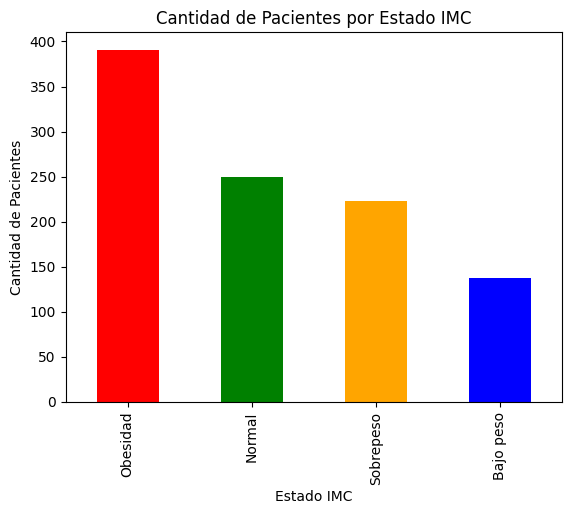

In [25]:
# Genera un gráfico de barras que muestre la cantidad de pacientes en cada categoría de Estado_IMC.
# Usa matplotlib para personalizar el gráfico con título, etiquetas y colores adecuados.
estado_imc_counts.plot(kind='bar', color=['red', 'green', 'orange', 'blue'])
mp.title('Cantidad de Pacientes por Estado IMC')
mp.xlabel('Estado IMC')
mp.ylabel('Cantidad de Pacientes')
mp.show()
